Import libaries and define relevent constants

In [17]:
import numpy as np
import matplotlib.pyplot as plt


r_0 = 1.2
A = 10
a = 0.6
V_LS = - 21.0

Define our woods saxon function and its derivative

In [18]:
def woods_saxon_function(r, a=a, r_0=r_0, A=A):
    return 1 / (1 + np.exp((r - r_0 * A**(1/3)) / a))

def dfws(r, a=a, r_0=r_0, A=A):
    R_0 = r_0 * A**(1/3)
    return -1 * np.exp((r - R_0) / a) / (a * r * (np.exp((r - R_0) / a) + 1)**2)

def gaussian_function(r, c_i, r_i):
    return c_i * np.exp(- (r / r_i)**2)

In [23]:
def complete_woods_saxon_potential(r, tot_ang_moment=1/2, orb_ang_moment=0):
    V_0 = -11.39 * (-1)**orb_ang_moment - 51.13 # Defines V_0 for odd and even l states
    spin_orbit_term = ((tot_ang_moment * (tot_ang_moment + 1)) / 2) - ((orb_ang_moment * (
        orb_ang_moment + 1)) / 2) - 0.375
    return V_0 * woods_saxon_function(r) + V_LS * spin_orbit_term * dfws(r)


def gaussian_potential(r, orb_ang_moment=0):
    V_0 = -11.39 * (-1)**orb_ang_moment - 51.13 # Defines V_0 for odd and even l states
    return V_0 * (gaussian_function(r, 0.272822, 0.49) + gaussian_function(r, -1.30687, 0.593052) + gaussian_function(
        r, 3.3052, 0.717777) + gaussian_function(r, -5.6565, 0.868733) + gaussian_function(r, 6.5652, 1.05144) + gaussian_function(
        r, -3.36817, 1.27256) + gaussian_function(r, -2.43681, 1.5402) + gaussian_function(r, 2.63772, 1.86412) + gaussian_function(
        r, 0.718998, 2.25616) + gaussian_function(r, 0.234668, 2.73065) + gaussian_function(r, 0.0186034, 3.30494) + gaussian_function(
        r, 0.00107583, 4))

C:\Users\faola\AppData\Local\Temp\ipykernel_3424\3717110339.py:6: RuntimeWarning: divide by zero encountered in divide
  return -1 * np.exp((r - R_0) / a) / (a * r * (np.exp((r - R_0) / a) + 1)**2)
C:\Users\faola\AppData\Local\Temp\ipykernel_3424\2817808254.py:5: RuntimeWarning: invalid value encountered in multiply
  return V_0 * woods_saxon_function(r) + V_LS * spin_orbit_term * dfws(r)


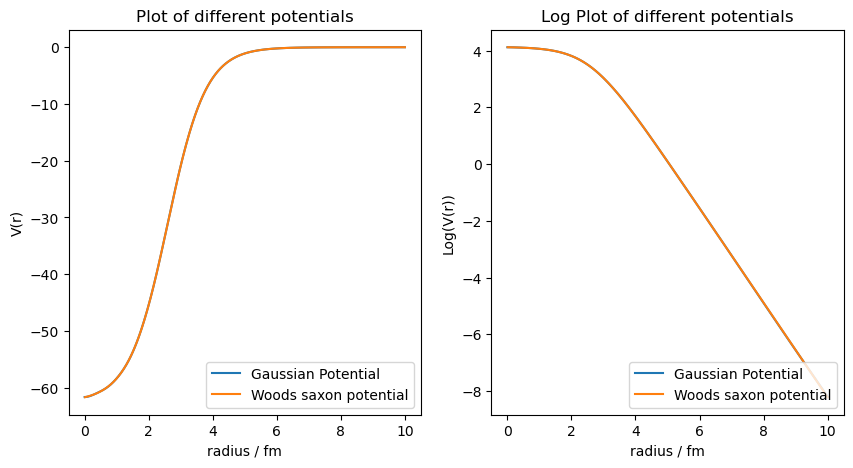

In [28]:
fig = plt.figure(figsize=(10,5))
spec = fig.add_gridspec(ncols=2, nrows=1)
ax_1 = fig.add_subplot(spec[0, 0])
ax_2 = fig.add_subplot(spec[0, 1])

x_values = np.linspace(0, 10, 1000)
#print(reduced_radial_wavefunction(x_values))

ax_1.set_title('Plot of different potentials')
ax_1.set_xlabel('radius / fm')
ax_1.set_ylabel('V(r)')
ax_1.plot(x_values, gaussian_potential(x_values), label='Gaussian Potential')
ax_1.plot(x_values, complete_woods_saxon_potential(x_values), label='Woods saxon potential')
ax_1.legend(loc='lower right')

ax_2.set_title('Log Plot of different potentials')
ax_2.set_xlabel('radius / fm')
ax_2.set_ylabel('Log(V(r))')
ax_2.plot(x_values, np.log( -gaussian_potential(x_values)), label='Gaussian Potential')
ax_2.plot(x_values, np.log( -complete_woods_saxon_potential(x_values)), label='Woods saxon potential')
ax_2.legend(loc='lower right')

plt.savefig('potentials_plot.png', dpi=300)
plt.show()